## Q1. Explain the importance of weight initialization in artificial neural networks. Why is it necessary to initialize the weights carefully.

### **Importance of Weight Initialization in Artificial Neural Networks**
Weight initialization plays a crucial role in the training and performance of an **Artificial Neural Network (ANN)**. Proper initialization ensures **faster convergence**, **stability in learning**, and **prevents issues like vanishing or exploding gradients**.

---

## **Why is Weight Initialization Necessary?**
1. **Avoiding Symmetry Problems**  
   - If all weights are initialized to the same value (e.g., all zeros), neurons in a layer will learn the **same features** and provide **redundant outputs**.
   - **Solution:** Use **random initialization** to ensure neurons learn different features.

2. **Preventing Vanishing or Exploding Gradients**  
   - In deep networks, if weights are too **small**, gradients shrink exponentially during backpropagation (**vanishing gradient**).
   - If weights are too **large**, gradients grow exponentially (**exploding gradient**).
   - **Solution:** Use proper initialization techniques like **Xavier (Glorot) or He initialization**.

3. **Faster Convergence**  
   - Well-initialized weights help the model **reach optimal parameters faster**.
   - Poor initialization can result in slow learning or stuck models.

4. **Reducing Training Instability**  
   - Improper weight initialization can cause **oscillations** and **divergence** in training.
   - Proper techniques ensure **smooth and stable** learning.

---

## **Types of Weight Initialization Techniques**
### **1. Zero Initialization (Bad Practice 🚫)**
- **Problem:** If all weights are initialized to zero, all neurons in a layer will learn the **same gradients** and update **identically**.
- **Result:** The model becomes like a single neuron, limiting learning.
  
```python
import tensorflow as tf

# Bad practice: Initializing weights to zero
W = tf.Variable(tf.zeros([3, 3]))
```

---

### **2. Random Initialization**
- Assign small random values to weights to break symmetry.

```python
W = tf.Variable(tf.random.normal([3, 3], mean=0.0, stddev=0.1))
```

---

### **3. Xavier (Glorot) Initialization**
- Used in **sigmoid** and **tanh** activations.
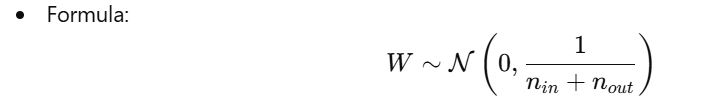

- **Prevents gradients from exploding or vanishing.**

```python
W = tf.Variable(tf.random.normal([3, 3], stddev=tf.sqrt(2.0 / (3 + 3))))
```

---

### **4. He Initialization (Best for ReLU)**
- Used in **ReLU-based networks**.
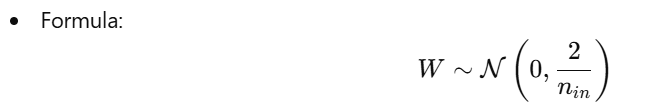

- Helps avoid **vanishing gradients** for ReLU activations.

```python
W = tf.Variable(tf.random.normal([3, 3], stddev=tf.sqrt(2.0 / 3)))
```

---

## **Comparison of Weight Initialization Techniques**
| Method        | Suitable Activation | Prevents Symmetry | Prevents Vanishing/Exploding Gradients |
|--------------|--------------------|------------------|----------------------------------|
| **Zeros** | None | ❌ No | ❌ No |
| **Random** | All | ✅ Yes | ❌ No |
| **Xavier (Glorot)** | Sigmoid, Tanh | ✅ Yes | ✅ Yes |
| **He Initialization** | ReLU, Leaky ReLU | ✅ Yes | ✅ Best for ReLU |

---

### **Key Takeaways**
✔ **Poor initialization leads to slow convergence or unstable training.**  
✔ **Xavier initialization** is great for **sigmoid/tanh**, while **He initialization** is best for **ReLU**.  
✔ **Proper weight initialization improves training speed, stability, and performance.**  

Would you like a visualization to see how different initializations affect training? 🚀

## Q2. Describe the challenges associated with improper weight initialization. How do these issues affect model training and convergence

### **Challenges Associated with Improper Weight Initialization**
Improper weight initialization can severely impact **model training, convergence speed, and final performance** in an Artificial Neural Network (ANN). The main challenges include:

---

## **1. Symmetry Problem**
### **Issue: All Neurons Learn the Same Features**
- If all weights in a layer are initialized to **the same value** (e.g., **zero** or a **constant**), neurons will compute **identical outputs**.
- As a result, all neurons will have **the same gradients** during backpropagation.
- **Effect:**  
  - The model behaves like a **single neuron** rather than a network.
  - **No learning diversity** occurs, limiting model expressiveness.

### **Example of Zero Initialization (Bad Practice)**
```python
import tensorflow as tf

# Initializing weights to zero (Incorrect)
W = tf.Variable(tf.zeros([3, 3]))
```
🔴 **Problem:** All neurons receive the same updates → No meaningful learning.

---

## **2. Vanishing Gradient Problem**
### **Issue: Gradients Become Too Small**
- In deep networks, if weights are **too small**, the **gradients shrink** exponentially as they propagate **backward**.
- **Effect:**  
  - The earlier layers receive **almost zero updates**, making them ineffective.
  - The model **stagnates** and takes too long to learn.

### **Example: Effect of Small Weights in Sigmoid Activation**
- Sigmoid activation function is:

  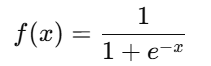
  
- If weights are small, neurons get stuck in the **flat region** of the sigmoid function → Gradient becomes **zero**.

#### **Solution: Xavier (Glorot) Initialization**
```python
# Xavier Initialization (Prevents vanishing gradients)
W = tf.Variable(tf.random.normal([3, 3], stddev=tf.sqrt(2.0 / (3 + 3))))
```

🟢 **Fix:** Xavier initialization ensures weights are **not too small**, allowing better gradient flow.

---

## **3. Exploding Gradient Problem**
### **Issue: Gradients Grow Too Large**
- If weights are initialized with **large values**, the gradients grow **exponentially** as they backpropagate.
- **Effect:**  
  - The loss function **diverges** instead of converging.
  - The network experiences **unstable updates**, causing training to fail.

### **Solution: He Initialization (Best for ReLU)**
- He initialization sets weights based on:
  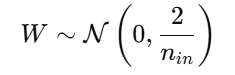
```python
# He Initialization (Prevents exploding gradients)
W = tf.Variable(tf.random.normal([3, 3], stddev=tf.sqrt(2.0 / 3)))
```

🟢 **Fix:** He initialization works well for **ReLU** activations.

---

## **4. Slow Convergence**
### **Issue: Poor Weight Initialization Leads to Slow Learning**
- If weights are **not well-distributed**, the model may take **many epochs** to reach good accuracy.
- **Effect:**  
  - **Training takes longer**.
  - Requires **more computational power**.

### **Solution: Use Standard Initialization Techniques**
✅ **Glorot Initialization**: Good for **sigmoid & tanh**  
✅ **He Initialization**: Best for **ReLU & Leaky ReLU**  

---

## **5. Dead Neurons in ReLU Activation**
### **Issue: Neurons Stop Updating**
- ReLU activation function:
 
 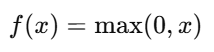
 
- If weights are initialized **negatively**, neurons output **zero** and stop learning.
- **Effect:**  
  - The model becomes **inactive**.
  - No updates occur for **dead neurons**.

### **Solution: Use He Initialization**
```python
# He Initialization for ReLU
W = tf.Variable(tf.random.normal([3, 3], stddev=tf.sqrt(2.0 / 3)))
```
🟢 **Fix:** Ensures ReLU neurons are properly activated.

---

## **Summary Table: Problems and Solutions**
| Problem                     | Cause                     | Effect on Training | Solution |
|-----------------------------|---------------------------|---------------------|------------|
| **Symmetry Problem**        | Same initial weights      | Neurons learn the same features | Use **random initialization** |
| **Vanishing Gradient**      | Very small weights       | Slow or no learning | Use **Xavier Initialization** |
| **Exploding Gradient**      | Very large weights       | Training instability | Use **He Initialization** |
| **Slow Convergence**        | Improper initialization  | Takes too many epochs | Use **proper initialization techniques** |
| **Dead Neurons in ReLU**    | Negative weights in ReLU | Some neurons stop learning | Use **He Initialization** |

---

### **Final Takeaways**
1. **Poor weight initialization** leads to **bad training performance**.
2. **Vanishing gradients slow learning**, exploding gradients make training **unstable**.
3. **Use proper techniques**:
   - ✅ **Xavier (Glorot) for sigmoid/tanh**
   - ✅ **He initialization for ReLU**
4. **Avoid zero initialization** to prevent neurons from learning the **same** features.

Would you like a **visualization of gradient issues** in deep networks? 🚀

## Q3. Discuss the concept of variance and how it relates to weight initialization. Why is it crucial to consider the variance of weights during initialization?

### **Concept of Variance and Its Importance in Weight Initialization**

Variance is a measure of **how much values deviate from their mean** in a dataset. In the context of **weight initialization in neural networks**, variance plays a crucial role in ensuring that activations and gradients remain **stable** during forward and backward propagation.

---

## **1. Why is Variance Important in Weight Initialization?**
### **Effects of Improper Variance in Weights**
- **If variance is too high (large weights)** → Activations **explode**, leading to **unstable gradients** (Exploding Gradient Problem).
- **If variance is too low (small weights)** → Activations **shrink**, leading to **almost zero gradients** (Vanishing Gradient Problem).

By carefully choosing the **variance of initial weights**, we can ensure:
✅ Proper flow of information through layers.  
✅ Stable gradient updates during training.  
✅ Faster convergence.

---

## **2. Mathematical Perspective: Forward and Backward Propagation**
### **Forward Propagation: Maintaining Activation Scale**
Each neuron in a layer computes:

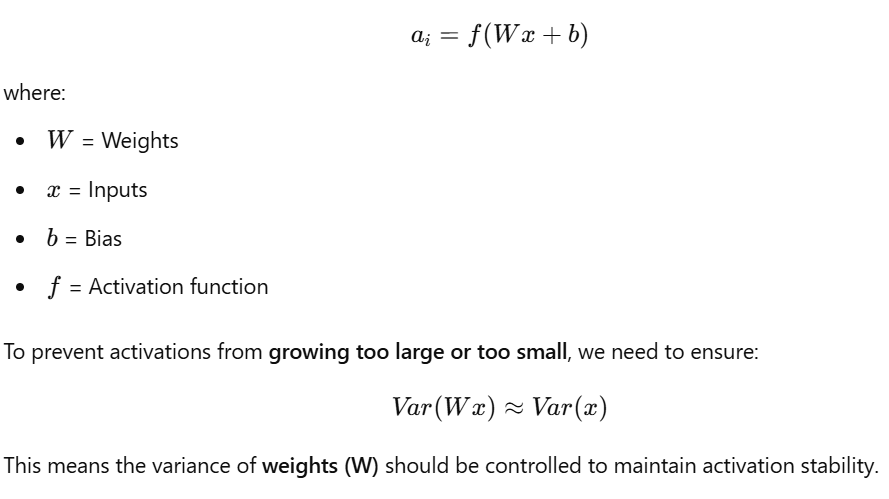

---

### **Backward Propagation: Controlling Gradient Variance**
During backpropagation, gradients are computed as:

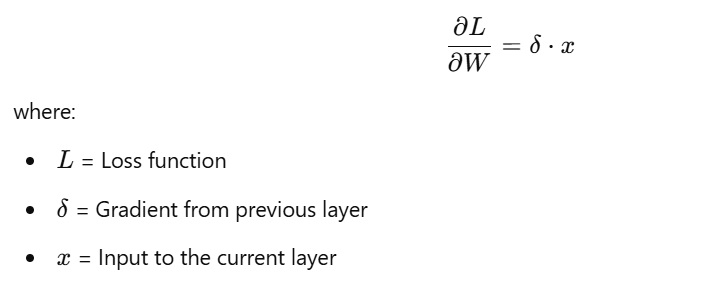


If the **variance of weights is too high**, gradients can **explode**.
If the **variance is too low**, gradients **vanish**.

Thus, we must **initialize weights carefully** to maintain a proper variance distribution.

---

## **3. How Variance is Used in Weight Initialization**
### **1️⃣ Xavier (Glorot) Initialization**
- Best for **sigmoid** and **tanh** activations.
- Ensures variance remains **constant** across layers.
- Formula:

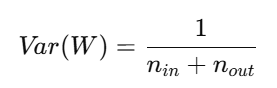

- **Prevents both vanishing and exploding gradients**.

```python
import tensorflow as tf

# Xavier Initialization
W = tf.Variable(tf.random.normal([3, 3], stddev=tf.sqrt(2.0 / (3 + 3))))
```

---

### **2️⃣ He Initialization (Best for ReLU)**
- Used for **ReLU-based networks**.
- Assigns larger variance to prevent neurons from becoming **dead**.
- Formula:

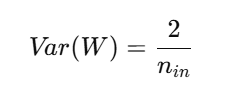


```python
# He Initialization
W = tf.Variable(tf.random.normal([3, 3], stddev=tf.sqrt(2.0 / 3)))
```

---

### **3️⃣ Lecun Initialization (Best for Sigmoid/Tanh)**
- Used in **shallow networks** with **sigmoid/tanh**.
- Ensures proper variance control.

```python
# LeCun Initialization
W = tf.Variable(tf.random.normal([3, 3], stddev=tf.sqrt(1.0 / 3)))
```

---

## **4. Summary of Variance Considerations in Weight Initialization**

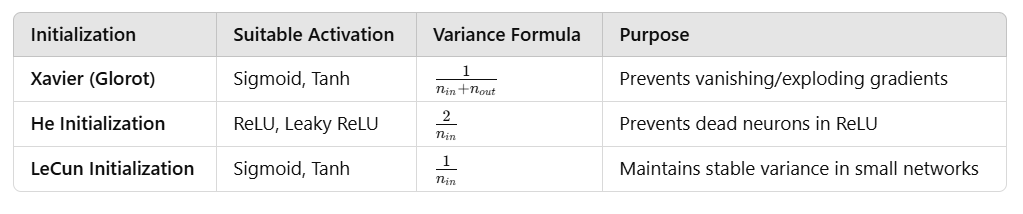


### **Final Takeaways**
✔ **Variance ensures activations & gradients don’t shrink or explode.**  
✔ **Proper variance in weights speeds up convergence & improves accuracy.**  
✔ **Different initialization methods use variance to maintain training stability.**  

Would you like a visualization comparing these initialization techniques? 🚀

## Part 2

## Q4.Explain the concept of zero initialization. Discuss its potential limitations and when it can be appropriate to use

### **Zero Initialization in Neural Networks**

**Zero initialization** refers to the practice of initializing **all weights** in a neural network to **zero** at the start of training.

```python
import tensorflow as tf

# Zero Initialization example
W = tf.Variable(tf.zeros([3, 3]))
b = tf.Variable(tf.zeros([3]))
```

---

## ✅ **Why Might It Seem Useful?**
- Simple to implement.
- Keeps the initial output of the network stable.
- Biases are often initialized to zero without problems.

However, while it may look harmless, **initializing weights to zero is generally a very bad practice** for deep neural networks.

---

## ❌ **Limitations of Zero Initialization**

### **1. Symmetry Problem**
- If all weights are initialized to the same value (zero), every neuron in the layer receives the same gradient and updates identically.
- **Effect:** All neurons **learn the same features**, making the network no better than having one neuron.

🔁 **Result**: No learning diversity → the network fails to converge meaningfully.

---

### **2. No Learning**
- During backpropagation, if weights are zero, the gradients remain the same across all units.
- **Weight updates become identical**, so the model doesn't learn distinct patterns.
- Especially problematic in multilayer networks.

---

### **3. Slower or Stagnant Convergence**
- If the network fails to break symmetry, the optimizer can **struggle to make progress**, or make very **slow progress**, requiring more epochs and compute time.

---

## ✅ **When Zero Initialization Can Be Appropriate**
While **initializing weights** to zero is **not recommended**, initializing **biases** to zero **is acceptable** in many cases.

### ✔ Use Zero Initialization for Biases:
```python
# Bias initialization to zero is OK
b = tf.Variable(tf.zeros([n]))
```

### ❗ Don't Use It for Weights:
Use **randomized initialization** (like Xavier or He) for weights to break symmetry.

---

## 🔁 **Better Alternatives**
| Initialization | Use Case | Why It's Better |
|----------------|----------|-----------------|
| **Xavier (Glorot)** | Sigmoid, Tanh | Keeps variance stable |
| **He Initialization** | ReLU, Leaky ReLU | Prevents dead neurons |
| **Random Normal/Uniform** | Generic | Breaks symmetry |

---

## 💡 Summary

| Aspect                     | Zero Initialization |
|----------------------------|---------------------|
| Easy to implement          | ✅ Yes              |
| Breaks symmetry            | ❌ No               |
| Enables learning           | ❌ No               |
| Recommended for weights    | ❌ No               |
| Recommended for biases     | ✅ Yes              |

---

### 📌 Final Takeaway
- ❌ **Don't use zero initialization for weights** — it prevents the network from learning effectively.
- ✅ **Zero initialization is fine for biases.**
- ✅ **Use Xavier or He initialization** for better training performance and faster convergence.

Would you like a side-by-side comparison of training results using zero vs. Xavier/He initialization? 🚀

## Q5. Describe the process of random initialization. How can random initialization be adjusted to mitigate potential issues like saturation or vanishing/exploding gradientsD

### **Random Initialization in Neural Networks**

**Random initialization** is the process of assigning small, random values to the weights of a neural network **before training begins**. This is essential to:
- Break symmetry between neurons,
- Allow the network to learn diverse features,
- Kickstart the forward and backward propagation process.

---

### ✅ **Basic Process of Random Initialization**
1. **Generate random values** (typically from normal or uniform distributions).
2. **Scale them properly** based on the number of input/output neurons.
3. **Assign these values** to the weights of each layer.

### 🧮 Example (Standard Random Initialization in TensorFlow):
```python
import tensorflow as tf

# Random Normal Initialization
W = tf.Variable(tf.random.normal([3, 3], mean=0.0, stddev=0.1))
```

---

### ⚠️ **Why Not Just Any Random Values?**

While randomization solves the **symmetry problem**, improper scaling of these random values can cause:

1. **Saturation of activation functions** like **sigmoid** or **tanh** (values stuck in the flat region of the curve).
2. **Vanishing gradients**: Gradients become too small during backpropagation, and the network stops learning.
3. **Exploding gradients**: Gradients become too large, leading to unstable updates.

---

## 🔧 **How to Adjust Random Initialization to Prevent These Issues**

The solution is to **scale the random values** based on the **number of inputs and/or outputs** using smart initialization strategies:

---

### **1. Xavier (Glorot) Initialization**

🔹 **Used for:** Sigmoid or Tanh  
🔹 **Goal:** Keeps variance of activations constant across layers  
🔹 **Formula:**

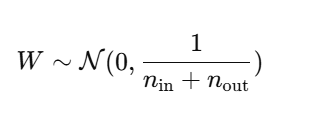

#### ✅ Prevents:
- Saturation in sigmoid/tanh
- Vanishing or exploding gradients

```python
initializer = tf.keras.initializers.GlorotNormal()
W = tf.Variable(initializer(shape=(input_dim, output_dim)))
```

---

### **2. He Initialization**

🔹 **Used for:** ReLU, Leaky ReLU  
🔹 **Goal:** Handles ReLU’s property of zeroing out negative values  
🔹 **Formula:**

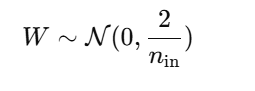

#### ✅ Prevents:
- Dead neurons
- Vanishing gradients in ReLU networks

```python
initializer = tf.keras.initializers.HeNormal()
W = tf.Variable(initializer(shape=(input_dim, output_dim)))
```

---

### **3. LeCun Initialization**

🔹 **Used for:** Sigmoid (especially in shallow networks)  
🔹 **Formula:**

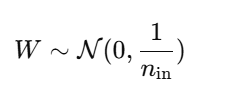


---

### 📊 Summary of Initializers

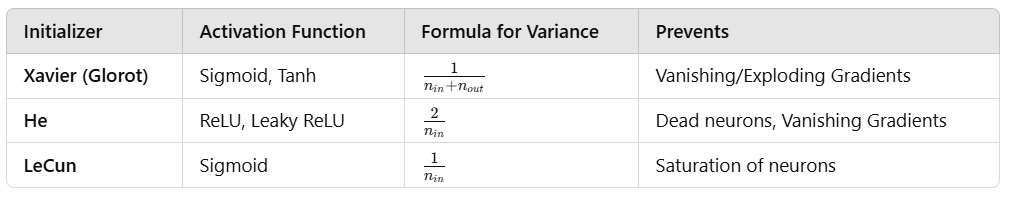
---

### 🧠 Final Takeaways

- ❌ Plain random values **without scaling** can lead to saturation, vanishing, or exploding gradients.
- ✅ Use **smart initialization** methods (Xavier, He, LeCun) that scale weights based on layer size.
- ✅ Good weight initialization leads to **faster convergence**, **stable learning**, and **better accuracy**.

Would you like a visual demo showing gradient flow with different initializations? 🚀

## Q6.Discuss the concept of Xavier/Glorot initialization. Explain how it addresses the challenges of improper weight initialization and the underlying theory behind it.

### 🔷 **Xavier/Glorot Initialization (Also Known as Glorot Initialization)**

**Xavier Initialization** is a **weight initialization technique** designed to maintain a **stable variance of activations and gradients** across layers in a deep neural network. It is especially effective for networks using **sigmoid** or **tanh** activation functions.

---

## ✅ **Why Xavier Initialization?**
When training deep neural networks, one of the key challenges is that:
- Activations and gradients can **shrink** (vanish) or **grow** (explode) **exponentially** as they propagate through layers.
- This can lead to:
  - **Vanishing gradients** (no learning in early layers),
  - **Exploding gradients** (unstable updates),
  - **Slow convergence** or **training failure**.

👉 **Xavier initialization** aims to **preserve the variance** of activations **across layers** by scaling the weights appropriately.

---

## 🧠 **Theoretical Foundation of Xavier Initialization**

### Suppose:

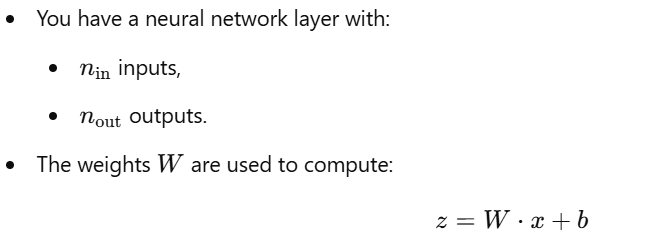

  followed by an activation function.

### The goal is to keep:

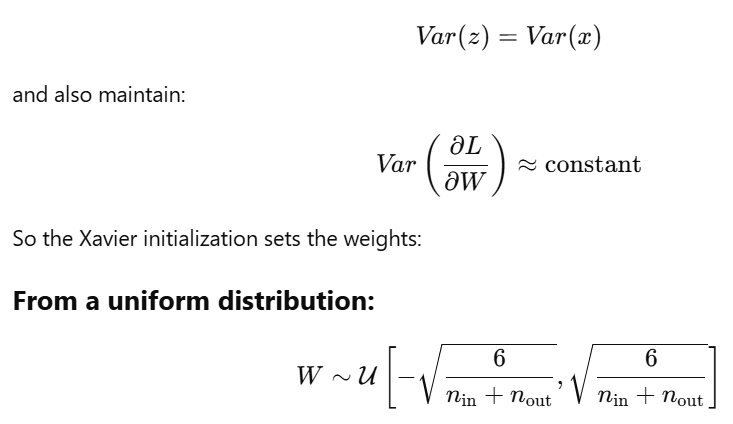

### **Or from a normal distribution:**

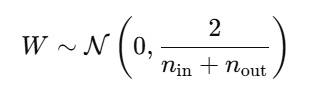


This keeps the **variance of activations and gradients stable**, which helps the network converge faster and train deeper architectures successfully.

---

## 🚧 **Problems Solved by Xavier Initialization**

| Problem                     | How Xavier Helps                          |
|----------------------------|-------------------------------------------|
| **Vanishing Gradients**    | Prevents gradients from shrinking too much |
| **Exploding Gradients**    | Prevents gradients from growing too large  |
| **Slow Convergence**       | Ensures smoother, balanced training        |
| **Activation Saturation**  | Keeps inputs in the active range of sigmoid/tanh |

---

## ⚙️ **When to Use Xavier Initialization**

| Activation Function | Recommended Initialization |
|---------------------|----------------------------|
| **Sigmoid**         | ✅ Xavier Initialization    |
| **Tanh**            | ✅ Xavier Initialization    |
| **ReLU / Leaky ReLU** | ❌ Use **He Initialization** instead |

---

## 🧪 **Implementation in TensorFlow**
```python
import tensorflow as tf

# Xavier/Glorot Normal Initialization
initializer = tf.keras.initializers.GlorotNormal()

# Example: Initializing weights for a dense layer with 128 inputs and 64 outputs
W = tf.Variable(initializer(shape=(128, 64)))
```

Or using Glorot Uniform:
```python
initializer = tf.keras.initializers.GlorotUniform()
W = tf.Variable(initializer(shape=(128, 64)))
```

---

## 🧩 **Summary**

| Feature                     | Xavier Initialization                       |
|----------------------------|----------------------------------------------|
| Target Problem             | Vanishing/Exploding gradients in deep nets   |
| Based On                   | Preserving variance across layers            |
| Distribution               | Normal or Uniform                            |
| Formula                    | \( \frac{1}{n_{\text{in}} + n_{\text{out}}} \) |
| Use Case                   | Sigmoid / Tanh activations                   |
| Alternative (for ReLU)     | He Initialization                           |

---

### ✅ **Key Takeaway:**
**Xavier initialization balances the variance of inputs and outputs across layers**, which is **essential for stable and efficient training**, especially in networks using **sigmoid or tanh** activations.

Would you like to compare Xavier and He initialization side-by-side with visual outputs? 🚀

## Q7. Explain the concept of He initialization. How does it differ from Xavier initialization, and when is it preferred?

### 🔶 **He Initialization: Concept, Difference from Xavier, and When to Use It**

**He Initialization**, also known as **Kaiming Initialization**, is a weight initialization method designed specifically for **ReLU** (Rectified Linear Unit) and its variants like **Leaky ReLU**.

It addresses the **vanishing gradient** problem in **deep networks** by keeping the variance of activations stable during **forward propagation**, especially in **ReLU-based** networks.

---

## ✅ **Why Do We Need He Initialization?**

### 🔁 Problem:
In deep networks using ReLU, a portion of the outputs becomes **zero** (since ReLU = max(0, x)), which causes:
- Output variance to shrink
- Gradients to vanish
- Dead neurons (neurons that stop learning)

---

## 🔍 **What He Initialization Does**
He Initialization maintains a **larger variance** than Xavier to account for ReLU’s **zeroing effect**.

---

### 📐 **Formula for He Initialization**

#### **He Normal Initialization (Gaussian):**

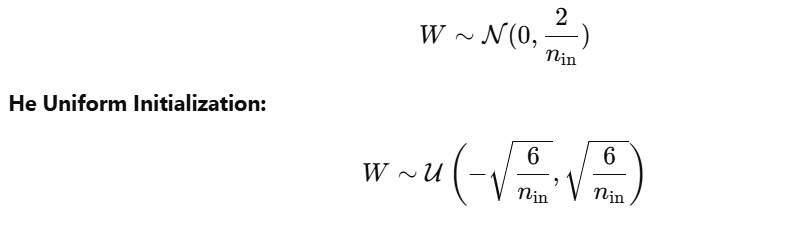


> `n_in` = number of input units to the layer.

This helps maintain the **forward signal variance** and allows **gradients to flow properly**.

---

## 🔄 **Difference: He Initialization vs Xavier Initialization**

| Feature                  | **Xavier Initialization**                       | **He Initialization**                      |
|--------------------------|--------------------------------------------------|--------------------------------------------|
| Designed For             | Sigmoid, Tanh                                   | ReLU, Leaky ReLU                            |
| Variance Formula         |              |
| Zeroing Behavior Handled | ❌ No                                            | ✅ Yes (accounts for ReLU zeroing)          |
| Gradient Flow Stability  | Moderate (for tanh/sigmoid)                     | Better (for ReLU)                           |
| Prevents Dead Neurons    | ❌ Sometimes                                     | ✅ Yes                                       |

---

## 🧪 **TensorFlow Example**

```python
import tensorflow as tf

# He Normal Initialization
he_normal = tf.keras.initializers.HeNormal()
W1 = tf.Variable(he_normal(shape=(128, 64)))

# He Uniform Initialization
he_uniform = tf.keras.initializers.HeUniform()
W2 = tf.Variable(he_uniform(shape=(128, 64)))
```

---

## 🧠 **When to Prefer He Initialization**

| Use Case                          | Recommended Initialization |
|----------------------------------|----------------------------|
| ReLU activation                  | ✅ He Initialization        |
| Leaky ReLU, Parametric ReLU      | ✅ He Initialization        |
| Sigmoid, Tanh                    | ❌ Use Xavier Initialization |
| Deep CNNs, DNNs with ReLU        | ✅ He Initialization        |

---

## 🎯 **Summary**

| Criteria               | He Initialization                     |
|------------------------|----------------------------------------|
| Handles                | ReLU & its variants                    |
| Prevents               | Vanishing gradients, dead neurons      |
| Better for             | Deep, ReLU-based networks              |
| Formula (Variance)     | \( \frac{2}{n_{\text{in}}} \)          |
| Implementation         | `tf.keras.initializers.HeNormal()`    |

---

### ✅ **Final Takeaway**
**He Initialization is preferred in deep networks using ReLU-type activations** because it preserves gradient flow and prevents neurons from dying due to zero outputs.

Would you like to compare He and Xavier initialization through training graphs or visual demos? 🚀

## Part 3

## Q8. Implement different weight initialization techniques (zero initialization, random initialization, Xavier initialization, and He initialization) in a neural network using a framework of your choice. Train the model on a suitable dataset and compare the performance of the initialized models.

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.initializers import Zeros,RandomNormal, GlorotNormal,HeNormal
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [4]:
(x_train,y_train),(x_test,y_test)= mnist.load_data()
x_train =x_train /255.0
x_test=x_test/255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
def create_model(initializer):
    model=Sequential([
        Flatten(input_shape=(28,28)),
        Dense(128,activation='relu',kernel_initializer=initializer),
        Dense(64,activation='relu',kernel_initializer=initializer),
        Dense(10,activation='softmax')  
    ])
    
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    
    return model

training with Zeros initializer


C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


training with RandomNormal initializer
training with Xavier (Glorot) initializer
training with He initializer


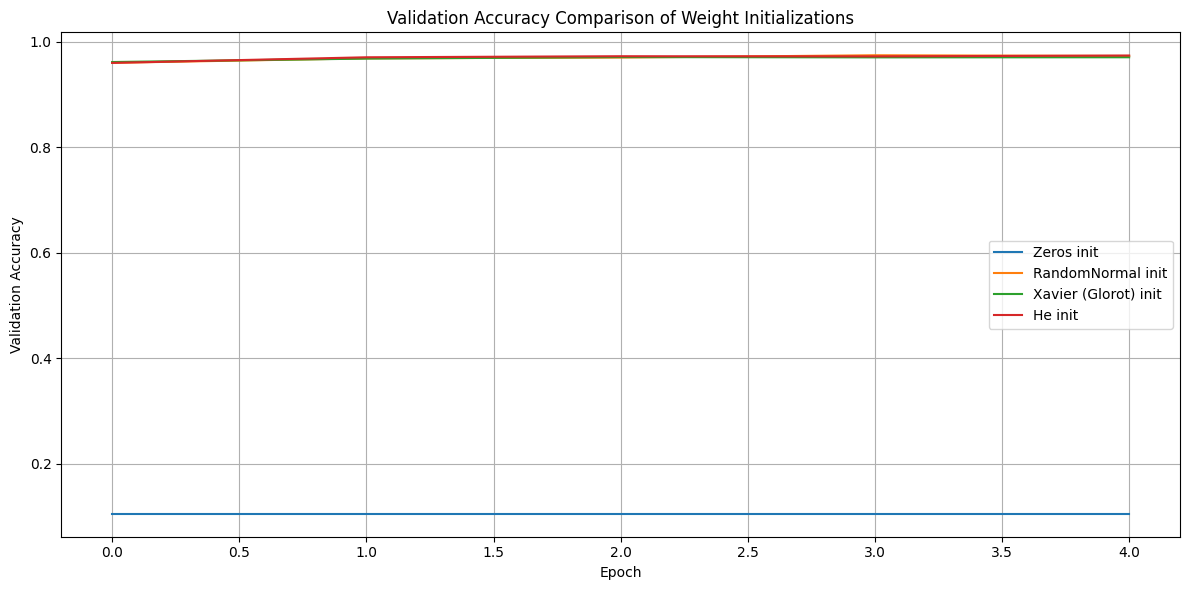

In [11]:
initializers={
    "Zeros":Zeros(),
    "RandomNormal": RandomNormal(mean=0.0,stddev=0.05),
    "Xavier (Glorot)": GlorotNormal(),
    "He": HeNormal()
}

histories={}

for name,init in initializers.items():
    print(f"training with {name} initializer")
    model=create_model(init)
    history= model.fit(x_train,y_train,epochs=5,batch_size=128,validation_split=0.1,verbose=0)
    histories[name]=history
    
plt.figure(figsize=(12,6))
for name,history in histories.items():
    plt.plot(history.history['val_accuracy'],label=f"{name} init")
    plt.title('Validation Accuracy Comparison of Weight Initializations')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Q9. Discuss the considerations and tradeoffs when choosing the appropriate weight initialization technique for a given neural network architecture and task.

### 🤖 **Choosing the Right Weight Initialization: Considerations & Trade-offs**

Weight initialization is **foundational** for training deep learning models effectively. It directly affects **convergence speed**, **model performance**, and whether training is **stable** or **explodes/stalls**.

---

## 🧠 **Key Considerations When Choosing a Weight Initialization Strategy**

### 1. **Activation Function**
- 🔹 Activation function determines how values are passed forward and gradients flow backward.
- Different activations require different variance handling.

| Activation      | Preferred Initialization  |
|----------------|----------------------------|
| **Sigmoid / Tanh** | Xavier (Glorot)             |
| **ReLU / Leaky ReLU / ELU** | He (Kaiming)              |
| **Softmax**     | Xavier (if used after tanh) |
| **No activation** (linear layer) | Standard Normal or Uniform |

---

### 2. **Depth of the Network**
- **Shallow networks**: Less sensitive, can use basic random initialization.
- **Deep networks**:
  - More prone to **vanishing/exploding gradients**.
  - Require careful initialization like **He** or **Xavier**.

---

### 3. **Architecture Type**
- **Fully connected (Dense) networks**: Standard initializers (Xavier, He) work well.
- **Convolutional Neural Networks (CNNs)**: Use **He initialization** (due to ReLU).
- **Recurrent Neural Networks (RNNs/LSTMs)**:
  - Sensitive to initialization.
  - Often require **orthogonal** or **custom initialization** for stability.

---

### 4. **Loss Function**
- When using **cross-entropy with sigmoid/tanh**, careful initialization prevents activation saturation.
- **Mean squared error (MSE)** with deep nets may need additional normalization layers.

---

### 5. **Input and Output Size of Layers**
- Initializers like **Xavier** and **He** automatically scale weights using:
  - \( n_in \): number of input units
  - \( n_out \): number of output units

This maintains **consistent variance** across layers, preventing shrinkage/explosion of values.

---

## ⚖️ **Tradeoffs Between Initialization Techniques**

| Initialization | Pros | Cons | Best Use Case |
|----------------|------|------|----------------|
| **Zeros** | Simple | ❌ Breaks symmetry, No learning | Only for biases |
| **Random Normal/Uniform** | Breaks symmetry | ❌ May cause instability in deep nets | Shallow networks |
| **Xavier (Glorot)** | Balances variance | ❌ Not ideal for ReLU | Sigmoid/Tanh activations |
| **He (Kaiming)** | Best for ReLU, prevents dead neurons | ❌ Too aggressive for sigmoid/tanh | Deep ReLU-based networks |
| **LeCun** | Great for small nets using sigmoid | ❌ Rarely used in practice | Shallow sigmoid/tanh networks |
| **Orthogonal** | Preserves information in RNNs | ❌ Costly to compute | RNNs, LSTMs |

---

## 📊 **Practical Guidelines**

| Scenario                                | Recommended Initializer |
|-----------------------------------------|--------------------------|
| Deep CNN with ReLU                      | He Initialization        |
| MLP with Sigmoid/Tanh                   | Xavier Initialization    |
| RNN/LSTM                                | Orthogonal Initialization|
| You don't know?                         | Start with **He Normal** |

---

## 💡 **Bonus Tips**
- Combine with **Batch Normalization** to further reduce sensitivity to initialization.
- For **very deep networks**, consider using **ResNet-style architectures** with skip connections, which are more forgiving to initialization choices.
- Use **pre-trained weights** if available (e.g., transfer learning) to skip initialization concerns altogether.

---

### ✅ **Conclusion**

The choice of weight initialization:
- **Depends on architecture, activation functions, and depth**.
- Can significantly **affect model performance**.
- Should be paired with other techniques like **batch normalization** and **appropriate optimizers**.

Choosing wisely leads to:
- 🟢 **Faster training**
- 🟢 **Better accuracy**
- 🟢 **Stable gradients**

Would you like a visual chart comparing performance of these initializers across a few model types? 🚀